# Описание проекта
## Контекст
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

# Загрузка библиотек

In [1]:
import pandas as pd
import numpy as np
import math as mt
import datetime as dt
import timeit 
from matplotlib import pyplot as plt
from scipy import stats as st
from math import factorial
from scipy.stats import norm
import seaborn as sns
ALPHA = 0.05
import warnings
warnings.simplefilter("ignore")

# Шаги анализа
## Шаг 1. Загрузка и проверка данных
## Шаг 2. Предобработка данных
## Шаг 3. Приоритизация гипотез
В тпблице *гипотез* по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
Задачи:
* Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

## Шаг 4. Анализ A/B-теста
Вы провели A/B-тест и получили результаты, которые описаны в файлах *orders* и *visitors*.
Задача
Проанализируйте A/B-тест:
* Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
* Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
* Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
* Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
* Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
* Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
* Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
* Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
* Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
* Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
* Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

## Шаг 5. Выводы

# Шаг 1. Загрузка и проверка данных

In [2]:
hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [3]:
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


Заголовки столбцов имеют прописные символы, это создает неудобство при работе. 
Данные заполнены полностью.

In [4]:
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [5]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Заголовки столбцов имеют прописные символы, это создает неудобство при работе. Данные заполнены полностью. Формат столбца *date* имеет неверный формат.


In [6]:
visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [7]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Данные заполнены полностью. Формат столбца *date* имеет неверный формат.

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>
    
Отлично, замечания касательно данных верные. Также можно было провести проверку на дубликаты и сделат общий вывод касательно качества данных.

</div>

# Шаг 2. Преобработка данных

Приведем заголовки столбцов к нижнему регистру

In [8]:
hypothesis.columns = hypothesis.columns.str.lower()
visitors.columns = visitors.columns.str.lower()

Переформатируем столбцы с датами

In [9]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>
    
Ты используешь правильные функции для свои целей, молодец! :)

</div>

# Шаг 3. Приоритизация гипотез

### Задача 1.  Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

Расчитаем показатель ICE

In [10]:
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence'])\
/ hypothesis['efforts']

Выделим показатель в новый датафрейм и сортируем по результатам ICE

In [11]:
hypothesis_ice  = hypothesis[['hypothesis','ice']].sort_values(by='ice', ascending=False)
hypothesis_ice

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


In [12]:
hypothesis

,hypothesis,reach,impact,confidence,efforts,ice
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000


Гипотезы **8, 0, 7, 6, 2** являются наиболее приоритетными задачами с позиции вероятного влияния их на выручку, без учёта пользовательского охвата.

### Задача 2.  Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

Расчитаем показатель RICE

In [13]:
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

Выделим показатель в новый датафрейм и сортируем по результатам RICE

In [14]:
hypothesis_ice  = hypothesis[['hypothesis','rice']].sort_values(by='rice', ascending=False)
hypothesis_ice

,hypothesis,rice
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


С учётом охватата пользователей, которых затронет тестирование, картина приоритезации меняется. В лидерах остаются гипотезы **7, 2, 0, 6, 8**, но изменяется их раположение в топе.

### Задача 3.  Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [15]:
hypothesis

,hypothesis,reach,impact,confidence,efforts,ice,rice
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2


Гипотезы первой пятерки как при расчёт ICE, так и RICE остается одна и таже, но добавление показателя охвата пользователей значительно влияет на расположение гипотез в рейтинге. Так гипотеза 7 и 2 значительно поднимаются в рейтинге, пножиая статус остальных гипотез, не имеющих столь высокого показателя по охвату пользователей.

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>
    
Молодец, ты сделал очень верные выводы! Здорово, что обратил внимание, что первая пятёрка остаётся неизменной. Также ты верно ответил на вопрос, почему меняется порядок гипотез в списке. Хорошо сделано :)

</div>

# Шаг 4. Анализ A/B-теста

Вы провели A/B-тест и получили результаты, которые описаны в файлах orders и visitors. Задача Проанализируйте A/B-тест:

### Задача 1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

Создадим набор уникальных пар значений дат и групп теста 

In [16]:
datagroup = orders[['date','group']].drop_duplicates()

Соберем данные по дням.

Расчитаем кумулятивные данные по дням о покупках

In [17]:
select_orders = (datagroup
                 .apply(lambda x: orders\
                        [np.logical_and(orders['date'] <= x['date'], \
                                        orders['group'] == x['group'])]
                        .agg({'date':'max',
                       'group':'max',
                       'transactionId':pd.Series.nunique,
                       'visitorId':pd.Series.nunique,
                       'revenue':'sum'}), axis=1)
                 .sort_values(by=['date','group']))
select_orders

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


Расчитаем кумулятивные данные по дням о визитах

In [18]:
select_visitors = (datagroup
                 .apply(lambda x: visitors \
                        [np.logical_and(visitors['date'] <= x['date'],\
                                        visitors['group'] == x['group'])]
                        .agg({'date':'max',
                              'group':'max',
                              'visitors':'sum'}), axis=1)
                 .sort_values(by=['date','group']))
select_visitors

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


Объединим таблицы для получения сводной таблицы по кумулятивным данным

In [19]:
pd.merge(select_visitors, select_orders,\
                          on=['date','group'])

,date,group,visitors,transactionId,visitorId,revenue
0,2019-08-01,A,719,24,20,148579
1,2019-08-01,B,713,21,20,101217
2,2019-08-02,A,1338,44,38,242401
3,2019-08-02,B,1294,45,43,266748
4,2019-08-03,A,1845,68,62,354874
...,...,...,...,...,...,...
57,2019-08-29,B,17708,596,544,5559398
58,2019-08-30,A,18037,545,493,4022970
59,2019-08-30,B,18198,620,567,5774631
60,2019-08-31,A,18736,557,503,4084803


In [20]:
cumulativedata = pd.merge(select_visitors, select_orders,\
                          on=['date','group'])




In [21]:
cumulativedata.rename(columns={'date':'date', 'group':'group', 'visitors':'visitors', 'transactionId':'orders','visitorId':'buyers', 'revenue':'revenue'}, inplace=True)
cumulativedata

,date,group,visitors,orders,buyers,revenue
0,2019-08-01,A,719,24,20,148579
1,2019-08-01,B,713,21,20,101217
2,2019-08-02,A,1338,44,38,242401
3,2019-08-02,B,1294,45,43,266748
4,2019-08-03,A,1845,68,62,354874
...,...,...,...,...,...,...
57,2019-08-29,B,17708,596,544,5559398
58,2019-08-30,A,18037,545,493,4022970
59,2019-08-30,B,18198,620,567,5774631
60,2019-08-31,A,18736,557,503,4084803


Выделим кумулятивные данные по каждой группе

In [22]:
cumulativedataA = cumulativedata[cumulativedata['group'] == 'A']\
[['date','orders', 'buyers', 'visitors', 'revenue']]
cumulativedataB = cumulativedata[cumulativedata['group'] == 'B']\
[['date','orders', 'buyers', 'visitors', 'revenue']]

Построим график выручки по группам

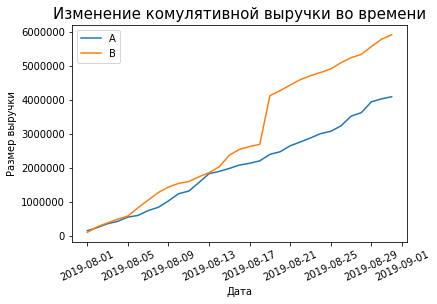

In [23]:
plt.plot(cumulativedataA['date'],cumulativedataA['revenue'], label='A')
plt.plot(cumulativedataB['date'],cumulativedataB['revenue'], label='B')
plt.legend()
plt.title('Изменение комулятивной выручки во времени', fontsize=15)
plt.ylabel('Размер выручки')
plt.xlabel('Дата')
plt.xticks(rotation=25);

Выручка группы **A** равномерно увеличивается в течение всего теста. Группа **B** несколько опережает её в росте, но в период с 17 по 21 августа происходит не аргументированный скачок в прибыли.

### Задача 2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

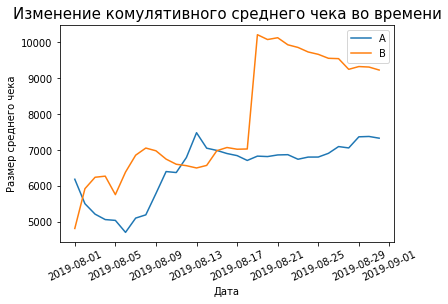

In [24]:
plt.plot(cumulativedataA['date'], \
         cumulativedataA['revenue']/cumulativedataA['orders'], \
         label='A')
plt.plot(cumulativedataB['date'], \
         cumulativedataB['revenue']/cumulativedataB['orders'], \
         label='B')
plt.legend()
plt.title('Изменение комулятивного среднего чека во времени',\
          fontsize=15)
plt.ylabel('Размер среднего чека')
plt.xlabel('Дата')
plt.xticks(rotation=25);

Изначально графики имеют различныйц рисунок. График группы **А** в начале теста показывает уменьшение среднего чека и возвращение его к плато к прохождению первой трети опыта. График группы **B** изначально растет скачкообразно выравнвается к середине опыта, где происходит резский скачок величины среднего чека в групп **B**, с последующим постепенным сниэение его величины.

### Задача 3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

In [25]:
cumulativedata_merge_var = cumulativedataA.merge(cumulativedataB, on=['date'], how='left', suffixes=['A', 'B'])
cumulativedata_merge_var.head()

,date,ordersA,buyersA,visitorsA,revenueA,ordersB,buyersB,visitorsB,revenueB
0,2019-08-01,24,20,719,148579,21,20,713,101217
1,2019-08-02,44,38,1338,242401,45,43,1294,266748
2,2019-08-03,68,62,1845,354874,61,59,1803,380996
3,2019-08-04,84,77,2562,425699,78,75,2573,489567
4,2019-08-05,109,100,3318,549917,101,98,3280,581995


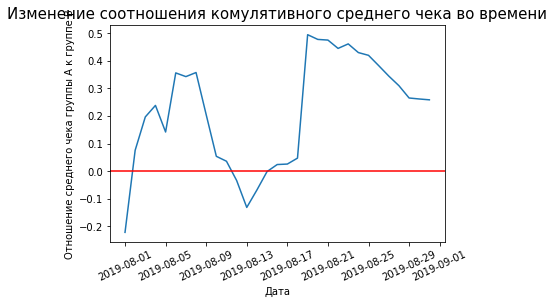

In [26]:
plt.plot(cumulativedata_merge_var['date'],\
         (((cumulativedata_merge_var['revenueB']/ \
           cumulativedata_merge_var['ordersB'])/ \
          (cumulativedata_merge_var['revenueA']/ \
            cumulativedata_merge_var['ordersA']))-1))
plt.axhline(y=0, color='red', linestyle='-')
plt.title('Изменение соотношения комулятивного среднего чека во времени',\
          fontsize=15)
plt.ylabel('Отношение среднего чека группы А к группе B')
plt.xlabel('Дата')
plt.xticks(rotation=25);

Отношение кмулятивного среднего чека группы **А** к группе **В** показывает, что данное соотношение за исследуемый период имело два пика когда средний чек группы **B** значительно превосходил этот показатеееуруппы **А**, но быстро снижался после пика. Вероятно такие изменения связаны с наличием выбросов в выборке.

### Задача 4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

In [27]:
cumulativedataA.head()

,date,orders,buyers,visitors,revenue
0,2019-08-01,24,20,719,148579
2,2019-08-02,44,38,1338,242401
4,2019-08-03,68,62,1845,354874
6,2019-08-04,84,77,2562,425699
8,2019-08-05,109,100,3318,549917


Посчитаем конверсию в каждой из групп

In [28]:
cumulativedataA['conversion'] = cumulativedataA['orders']/cumulativedataA['visitors']
cumulativedataB['conversion'] = cumulativedataB['orders']/cumulativedataB['visitors']


In [29]:
cumulativedataA.head()

,date,orders,buyers,visitors,revenue,conversion
0,2019-08-01,24,20,719,148579,0.033380
2,2019-08-02,44,38,1338,242401,0.032885
4,2019-08-03,68,62,1845,354874,0.036856
6,2019-08-04,84,77,2562,425699,0.032787
8,2019-08-05,109,100,3318,549917,0.032851


Построим график изменения конверсии во времени

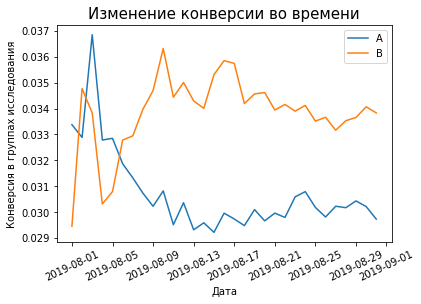

In [30]:
plt.plot(cumulativedataA['date'], \
         cumulativedataA['conversion'], \
         label='A')
plt.plot(cumulativedataB['date'], \
         cumulativedataB['conversion'], \
         label='B')
plt.legend()
plt.title('Изменение конверсии во времени',\
          fontsize=15)
plt.ylabel('Конверсия в группах исследования')
plt.xlabel('Дата')
plt.xticks(rotation=25);

Изначально в первую неделю опыта в обеих группах происходит скачок конверсии, после чего группы значительно расходятся. В шруппе **А** просиходит снижение конверсии до уровня 0.03 вокруг которого значение и флуктуирует на протяжении опыта. В группе **B** после скачка до 0.035 происходит постепенное снижение значений конверсии.

### Задача 5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

Объединим данные по конверсии в группе


In [31]:
cumulativeconversion = (cumulativedataA[['date','conversion']]
                        .merge(cumulativedataB[['date','conversion']],\
                               on='date', suffixes=['A','B']))
cumulativeconversion.head()

,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


Построим график отношения кумулятивной конверсии групп B к группе А

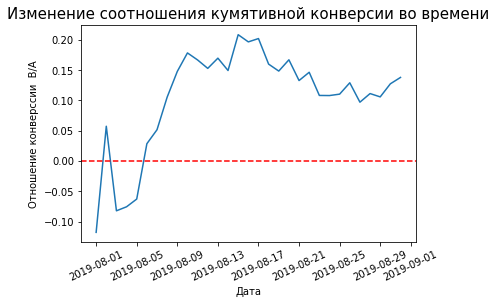

In [32]:
plt.plot(cumulativeconversion['date'],(cumulativeconversion['conversionB']/\
          cumulativeconversion['conversionA'])-1)
plt.title('Изменение соотношения кумятивной конверсии во времени',\
          fontsize=15)
plt.ylabel('Отношение конверссии  B/A')
plt.xlabel('Дата')
plt.axhline(y=0, color='red', linestyle='--')
plt.xticks(rotation=25);

На графике видно, что чем дольше идёт тест, тем больше увеличивается конверсия в группе **B** по отношению к группе **A**. По мере проведения теста динамика соотношения изменяется.  Втечении первой недели превалирует кумулятивная конверси в группе **A**, после первой недели начинается рост конверсии в группе **B**. В третьей части теста начинается снижение значения соотношения конверсий в группах, что, вероятно, вызвано снижением конверсии в группе **B**.

### Задача 6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

Для построения графика по количеству заказов, посчитаем количество заказов на каждого пользователя

In [33]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [34]:
orders_user_per_orders = orders.groupby(by='visitorId').agg({'transactionId':'nunique'})
orders_user_per_orders.head()

,transactionId
visitorId,
5114589,1
6958315,1
8300375,2
11685486,1
39475350,1


Посмотрим распрделение количества заказов пользователей

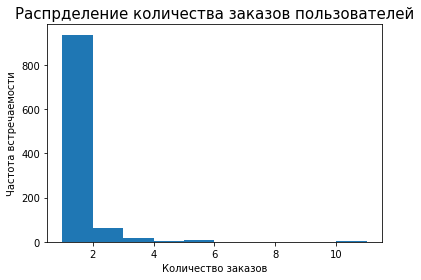

In [35]:
plt.hist(orders_user_per_orders['transactionId']);
plt.title('Распрделение количества заказов пользователей',\
          fontsize=15)
plt.ylabel('Частота встречаемости')
plt.xlabel('Количество заказов');

Видно, что большая часть значений принадлежит диапазону от 1 до 4 закзов. Построим точечный график и определим выбросы.

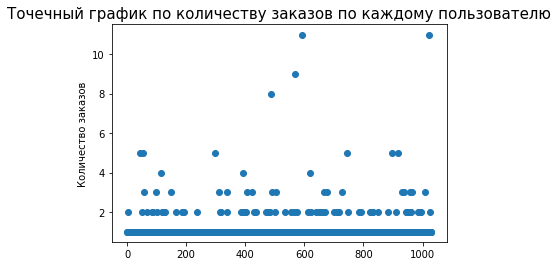

In [36]:
x_values  = pd.Series(range(0,len(orders_user_per_orders['transactionId'])))
plt.scatter(x_values, orders_user_per_orders['transactionId']);
plt.title('Точечный график по количеству заказов по каждому пользователю',\
          fontsize=15)
plt.ylabel('Количество заказов');

Как и равнее мы видим, что большая часть заказов принадлежит от 1 до 4 заказов на пользователя. Остальные значения, вероятно, являются выбросами.

### Задача 7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

Определим какие значения приходятся на 95 и 99 процентиль и оценим возможность использования этих значений как границ для выделения аномалий.

In [37]:
print(np.percentile(orders_user_per_orders['transactionId'],[95,99]))

[2. 4.]


Не более 5% пользователей совершает более **двух** покуп и не более 1% совершает более **четырёх** покупок. Вероятно, стоит выбрать границу в **4** заказа, как границу отсеивания аномальных пользователей

### Задача 8.  Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

Посмотрим на распределение выручки с заказов

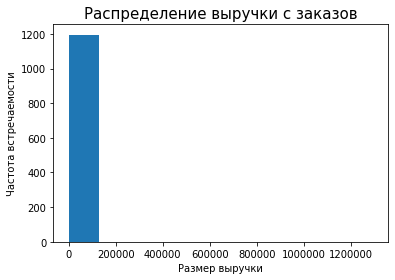

In [38]:
plt.hist(orders['revenue'])
plt.title('Распределение выручки с заказов',\
          fontsize=15)
plt.ylabel('Частота встречаемости')
plt.xlabel('Размер выручки');

Из графика видно, что большая часть заказов имеет размер до 200000. Посмотрим на точечный график по размеру выручки с заказов 

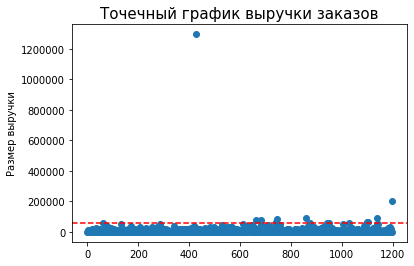

In [39]:
x_values_revenue = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values_revenue, orders['revenue']);
plt.title('Точечный график выручки заказов',\
          fontsize=15)
plt.ylabel('Размер выручки');
plt.axhline(y=58000, color='red', linestyle='--');

По графику видно, что лишь несколько заказов выбиваются из общего пула заказов.

### Задача 9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

Расчитаем значения 95 и 99 процентилей и определим возможность использования этих значений как границ для выделения аномалий.

In [40]:
print(np.percentile(orders['revenue'], [95,99]))

[28000.  58233.2]


Не более 5% пользователей совершает более **28000** покуп и не более 1% совершает более **58233** покупок. Вероятно, стоит выбрать границу в 58000 стоимости, т.к. это позволит отсечь аномальных пользователей не затронув возможных клиентов, совершивших дорогие покупки.

### Задача 10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

Расчитаем значение критерия Шапиро-Уилка и определим принадлежность распределения к нормальному.

In [41]:
cumulativeconversion.head()

,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


In [42]:
resultA = st.shapiro(cumulativeconversion['conversionA'])
p_valueA = resultA[1]
if p_valueA < ALPHA:
    print(f"Отвергаем нулевую гипотезу: распределение не нормально. p={p_valueA}")
else:
    print(f"Не получилось отвергнуть нулевую гипотезу, всё нормально. p={p_valueA}")

Отвергаем нулевую гипотезу: распределение не нормально. p=6.356380254146643e-06


In [43]:
resultB = st.shapiro(cumulativeconversion['conversionB'])
p_valueB = resultB[1]
if p_valueB < ALPHA:
    print(f"Отвергаем нулевую гипотезу: распределение не нормально. p={p_valueB}")
else:
    print(f"Не получилось отвергнуть нулевую гипотезу, всё нормально. p={p_valueB}")

Отвергаем нулевую гипотезу: распределение не нормально. p=0.0009982470655813813


Т.к. выборки распределены не нормально, используем для сравнения критерий Манна-Уитни

In [44]:
resultsAB = st.mannwhitneyu(cumulativeconversion['conversionA'],\
                            cumulativeconversion['conversionB'])
p_valueAB = resultsAB[1]
if p_valueAB < ALPHA:
    print(f"Отвергаем нулевую гипотезу: разница статистически значима. p={(p_valueAB).round(10)}")
else:
    print(f"Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя. p={(p_valueAB).round(10)}")

Отвергаем нулевую гипотезу: разница статистически значима. p=1.24e-08


In [45]:
conver_rev = (cumulativeconversion['conversionB'].mean() / cumulativeconversion['conversionA'].mean() - 1).round(3)
print(f"Относительное изменение группы В к А: {conver_rev}")

Относительное изменение группы В к А: 0.102


Судя по первичным даннымм выборки по конверсиям в группах различаются, и различие в данных сотавяет около 10%.

### Задача 11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Расчитаем значения среднего чека в каждой выборке.
Сделаем выборку по каждой группе

In [46]:
mean_chek_per_userA = orders[orders['group']=='A']
mean_chek_per_userB = orders[orders['group']=='B']

Определим принадлежит ли распределение выборок нормальному распределению.

In [47]:
result_mean_chekA = st.shapiro(mean_chek_per_userA['revenue'])
p_value_mean_chekA = result_mean_chekA[1]
if p_value_mean_chekA < ALPHA:
    print(f"Отвергаем нулевую гипотезу: распределение не нормально. p={p_value_mean_chekA}")
else:
    print(f"Не получилось отвергнуть нулевую гипотезу, всё нормально. p={p_value_mean_chekA}")

Отвергаем нулевую гипотезу: распределение не нормально. p=1.739703399801917e-34


In [48]:
result_mean_chekB = st.shapiro(mean_chek_per_userB['revenue'])
p_value_mean_chekB = result_mean_chekB[1]
if p_value_mean_chekB < ALPHA:
    print(f"Отвергаем нулевую гипотезу: распределение не нормально. p={p_value_mean_chekB}")
else:
    print(f"Не получилось отвергнуть нулевую гипотезу, всё нормально. p={p_value_mean_chekB}")

Отвергаем нулевую гипотезу: распределение не нормально. p=0.0


Т.К. распределение не нормально, используем критерий Манна-Уитни

In [49]:
results_mean_chekAB = st.mannwhitneyu(mean_chek_per_userB['revenue'],\
                            mean_chek_per_userA['revenue'])
p_value_mean_chekAB = results_mean_chekAB[1]
if p_value_mean_chekAB < ALPHA:
    print(f"Отвергаем нулевую гипотезу: разница статистически значима. p={(p_value_mean_chekAB).round(3)}")
else:
    print(f"Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя. p={(p_value_mean_chekAB).round(3)}")

Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя. p=0.365


In [50]:
chek_rev = (mean_chek_per_userB['revenue'].mean() / mean_chek_per_userA['revenue'].mean() - 1).round(3)
print(f"Относительное изменение группы В к А: {chek_rev}")

Относительное изменение группы В к А: 0.259


Статистическая значимость различия среднего чека групп А и B не доказана, следовательно, тест не оказывает значительного влияния на средний чек.

### Задача 12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

In [51]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Выделим группы пользователей

In [52]:
orders_pre_user_A = (orders[orders['group']=='A']
                     .groupby('visitorId', as_index=False)
                     .agg({'transactionId':'nunique','date':'max'}))
orders_pre_user_A.columns=['userId', 'orders','date']
orders_pre_user_A.head()

,userId,orders,date
0,8300375,1,2019-08-07
1,11685486,1,2019-08-23
2,54447517,1,2019-08-08
3,66685450,1,2019-08-13
4,78758296,1,2019-08-15


In [53]:
orders_pre_user_B = (orders[orders['group']=='B']
                     .groupby('visitorId', as_index=False)
                     .agg({'transactionId':'nunique','date':'max'}))
orders_pre_user_B.columns=['userId', 'orders','date']
orders_pre_user_B.head()

,userId,orders,date
0,5114589,1,2019-08-16
1,6958315,1,2019-08-04
2,8300375,1,2019-08-01
3,39475350,1,2019-08-08
4,47206413,1,2019-08-10


Выделим аномальных пользователей согласно выбраным границам

По количеству покупок более 4-х

In [54]:
anomal_users_orders = (pd.concat([orders_pre_user_A[orders_pre_user_A['orders'] > 4]['userId'],
                          orders_pre_user_B[orders_pre_user_B['orders'] > 4]['userId']], axis=0))
anomal_users_orders.head()

227    2038680547
278    2458001652
499    4256040402
326    2378935119
340    2458001652
Name: userId, dtype: int64

По количеству объёму покупок более 58000

In [55]:
anomal_users_revenue = orders[orders['revenue'] > 58000]['visitorId']
anomal_users_revenue.head()

425    1920142716
662    4266935830
682    4266935830
743    4133034833
744     888512513
Name: visitorId, dtype: int64

In [56]:
anomal_users = (pd.concat([anomal_users_revenue, anomal_users_orders], axis=0)
                .drop_duplicates()
                .sort_values())
anomal_users.head()

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
dtype: int64

Выделим данные по группам и отсечём аномальные данные

In [57]:
orders_not_anomal = orders[np.logical_not(orders['visitorId'].isin(anomal_users))]

In [58]:
orders_not_anomal_A = orders_not_anomal[orders_not_anomal['group'] == 'A']

In [59]:
orders_not_anomal_B = orders_not_anomal[orders_not_anomal['group'] == 'B']

In [60]:
orders_not_anomal_B

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1186,2116724386,2146711261,2019-08-14,15380,B
1189,4082620617,393266494,2019-08-14,31550,B
1190,38478481,1197745035,2019-08-14,8600,B
1191,3592955527,608641596,2019-08-14,16490,B


In [61]:
orders_not_anomal_A_group = (orders_not_anomal_A
                              .groupby(by='date')
                              .agg({'transactionId':'nunique',
                                    'visitorId':'nunique', 
                                    'revenue':'sum'})
                             .reset_index())
orders_not_anomal_A_group.columns = ['date', 'orders','visitors_nun','revenue']

In [62]:
orders_not_anomal_B_group = (orders_not_anomal_B
                             .groupby(by='date')
                             .agg({'transactionId':'nunique',
                                   'visitorId':'nunique', 
                                   'revenue':'sum'})
                             .reset_index())
orders_not_anomal_B_group.columns = ['date', 'orders','visitors_nun','revenue']

Повторим операции для данных с визитами

In [63]:
visitors_A = visitors[visitors['group'] == 'A']
visitors_B = visitors[visitors['group'] == 'B']

In [64]:
visitors_A_group = visitors_A.groupby(by='date')['visitors'].sum().reset_index()
visitors_B_group = visitors_B.groupby(by='date')['visitors'].sum().reset_index()

Объедим данные по покупкам и визитам клиентов

In [65]:
orders_not_anomal_visitors_A_group = visitors_A_group.merge(orders_not_anomal_A_group, on='date')

orders_not_anomal_visitors_B_group = visitors_B_group.merge(orders_not_anomal_B_group, on='date')

Посчитаем данные по конверсии

In [66]:
orders_not_anomal_visitors_A_group['conversion'] = orders_not_anomal_visitors_A_group['orders'] / orders_not_anomal_visitors_A_group['visitors']

In [67]:
orders_not_anomal_visitors_B_group['conversion'] = orders_not_anomal_visitors_B_group['orders'] / orders_not_anomal_visitors_B_group['visitors']

Расчитаем значимость статистического различия средних по конверсии и их относительное изменение

In [68]:
p_value_not_anomal = st.mannwhitneyu(orders_not_anomal_visitors_A_group['conversion'], orders_not_anomal_visitors_B_group['conversion'])[1]

In [69]:
visitors_qual = orders_not_anomal_visitors_B_group['conversion'].mean()/orders_not_anomal_visitors_A_group['conversion'].mean()-1

In [70]:
print("Достигнутый уровень значимости {0:.3f}".format(p_value_not_anomal))
print("Относительное различие в конверсии B к A: {0:.3f}".format(visitors_qual))

Достигнутый уровень значимости 0.027
Относительное различие в конверсии B к A: 0.166


Различие в конверсии между группами значимо. В группе **B** конверсия выше на 16%, чем в группе **А**.

### Задача 13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Проведем анализ статистической значимости различий средних значений "очищенных" выборок по среднему чеку

In [71]:
results_mean_chekAB = st.mannwhitneyu(orders_not_anomal_B['revenue'],\
                            orders_not_anomal_A['revenue'])
p_value_mean_chekAB = results_mean_chekAB[1]
if p_value_mean_chekAB < ALPHA:
    print(f"Отвергаем нулевую гипотезу: разница статистически значима. p={(p_value_mean_chekAB).round(3)}")
else:
    print(f"Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя. p={(p_value_mean_chekAB).round(3)}")

Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя. p=0.425


Изучим относительное изменение среднего чека группы **B** к группе **А** в течение опыта

In [72]:
chek_rev = (orders_not_anomal_B['revenue'].mean() / orders_not_anomal_A['revenue'].mean() - 1).round(3)
print(f"Относительное изменение группы В к А: {chek_rev}")

Относительное изменение группы В к А: -0.006


Таким образом значимых изменений, даже в очищенных данных, не обнаружено. Относительное изменение группы **B** к группе **А**, незначительно и составляет 0,6%.

### Задача 14. Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

При проверке приоритетной гипотезе были полученны данные, по двум группам. При проверке результатов тестов ключевыми метриками были *конверсия* посетителей в покупатели и *средний чек* покупателя. При оценке резульатов были выявлены аномалии в количестве покупок клиентов и размере среднего чека. Оценили влияние теста.Далее провели очистку данных от  аномалий. И так же оценили влияние теста.

По результам видно, что различий по среднему чеку нет ни в  **"сырых"**, ни в **"очищенных"** данных. Относительное изменение  среднего чека  группы *B* к группе *А* по очищенным данным составило всего лишь **0,6%**. Изменение конверсии по очищенным данным составило **17%**, т.е. в группе B было больше на 17% больше переходов к покупкам в группе А. Следовательно, такое изменение примененое в группе **В** повышает выручку. Таким образом нужно **остановить тест и зафиксировать победу группы B.**